# Introduction to pandas, visualizing Titanic

## Master 2 TSE

#### Raphaël Sourty

In [24]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [2]:
cd C:\Users\lmfx\Documents\GitHub\data-science-tutorials

C:\Users\lmfx\Documents\GitHub\data-science-tutorials


In [52]:
df = pd.read_csv('./data/train.csv')

In [46]:
#df.dropna(subset = ['Cabin'], inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [12]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


<AxesSubplot:xlabel='Survived'>

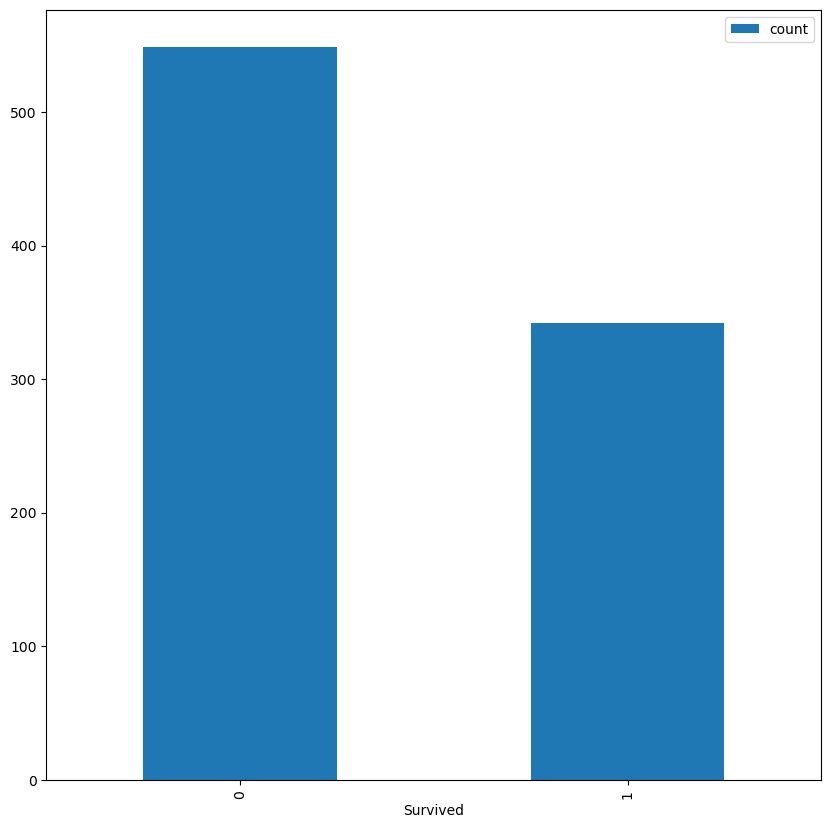

In [13]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

#### Survival rate depending on genre

In [14]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [15]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

<AxesSubplot:xlabel='Survived'>

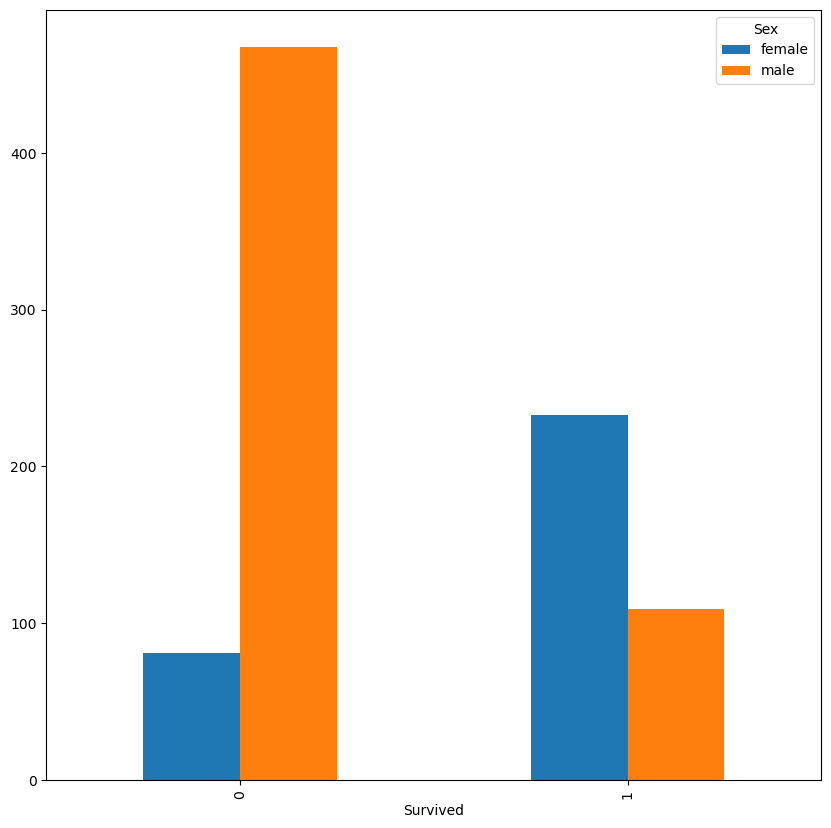

In [16]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Ticket class

In [17]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].agg(
    ['count']
)

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [18]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Survived'>

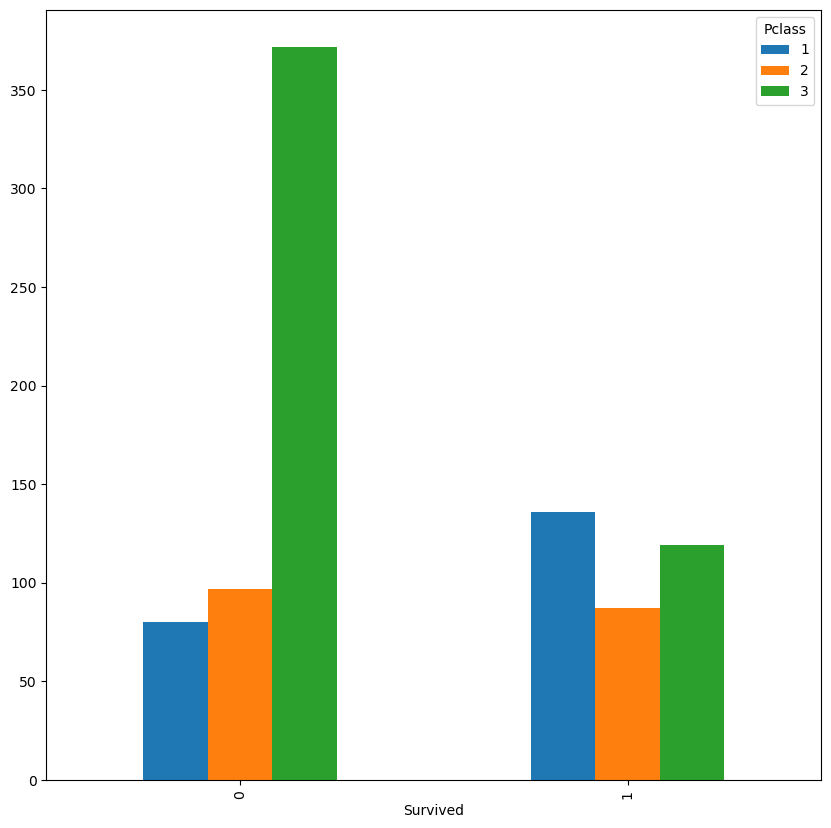

In [19]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [53]:
df['generation'] = pd.cut(df['Age'], 8)

In [54]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(df['Age'], 8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888                 NaN
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]"


<AxesSubplot:xlabel='Survived'>

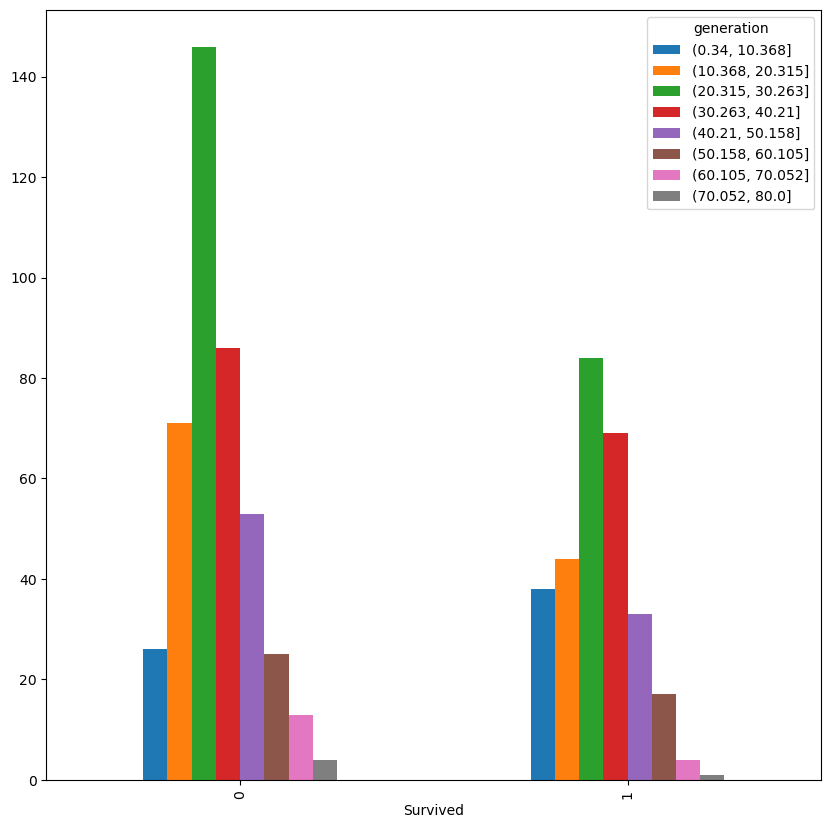

In [22]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [49]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [55]:
pd.cut(df['Fare'], 10)

0       (-0.512, 51.233]
1      (51.233, 102.466]
2       (-0.512, 51.233]
3      (51.233, 102.466]
4       (-0.512, 51.233]
             ...        
886     (-0.512, 51.233]
887     (-0.512, 51.233]
888     (-0.512, 51.233]
889     (-0.512, 51.233]
890     (-0.512, 51.233]
Name: Fare, Length: 891, dtype: category
Categories (10, interval[float64, right]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

<AxesSubplot:xlabel='Survived'>

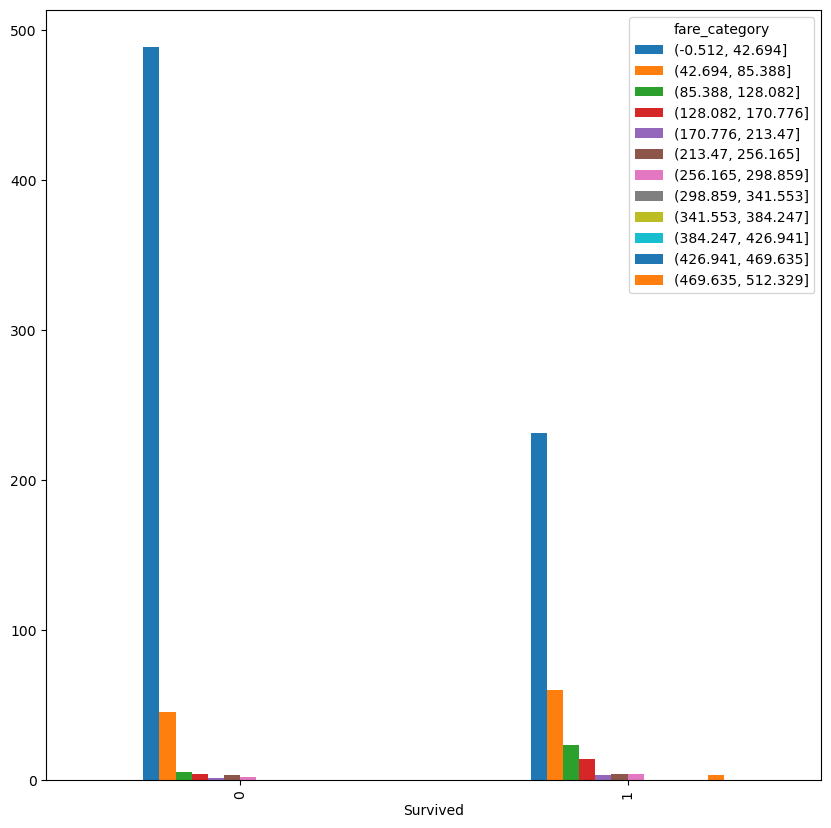

In [25]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [26]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


In [27]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### 1) Which side of the boat is better to be on? 


#### 2) The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?

#### 3) Where is the best place to be on the boat in general?

#### 4) Is there a link between the number of parents/family on the boat and chances of survival?

#### 5) What is the typical profile of the person who will survive the shipwreck?

#### 6) What is the typical profile of the person who will not survive the shipwreck?

In [ ]:
#Il existe deux formats de Cabin différents : F EG24 (1) et les cellules qui contiennent plusieurs valeurs de Cabin dans la même cellule (2)

##### QUESTION 1 ######

In [56]:
#Drop NA from the column Cabin
df2 = df.dropna(subset = ['Cabin'])

In [57]:
#Nb de passagers par cabines
df2['cabin_multiple'] = df2.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
df2

C:\Users\lmfx\AppData\Local\Temp\ipykernel_4836\2716736415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cabin_multiple'] = df2.Cabin.apply(lambda x: 0 if pd.isna(x)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,cabin_multiple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]",1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]",1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]",1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(40.21, 50.158]",1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,"(30.263, 40.21]",3
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,"(50.158, 60.105]",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.368, 20.315]",1


In [58]:
#Avec ce code, on extrait le numéro de cabine pour le format (1): deux lignes sont crées : une ligne F et une ligne EG24
#La ligne F donnera un NAN quand on va créer la variable num_cabin, donc on supprimera cette ligne sans perdre d'info
df2 = (
 df2.assign(cabin=df2['Cabin'].str.split('  '))
   .explode('cabin')
   .reset_index(drop=True)
)   

In [59]:
#Avec ce code, on extrait le numéro de cabine pour le format (2)
df2 = (
 df2.assign(cabin2=df2['cabin'].str.split(' '))
   .explode('cabin2')
   .reset_index(drop=True)
)   

In [60]:
#Extraction du numéro de cabine et suppression des NAN
df2["num_cabin"] = df2.cabin2.str.extract('(\d+)')
df2.dropna(subset = ['num_cabin'], inplace=True)
df2 = df2.drop('cabin', axis=1)
df2['num_cabin'] = df2['num_cabin'].astype(str).astype(int)

In [112]:
#pd.set_option('display.max_rows', 500)

In [61]:
df2["side"] = np.where(df2.num_cabin % 2==0,"port side", "starboard side")

<AxesSubplot:xlabel='Survived'>

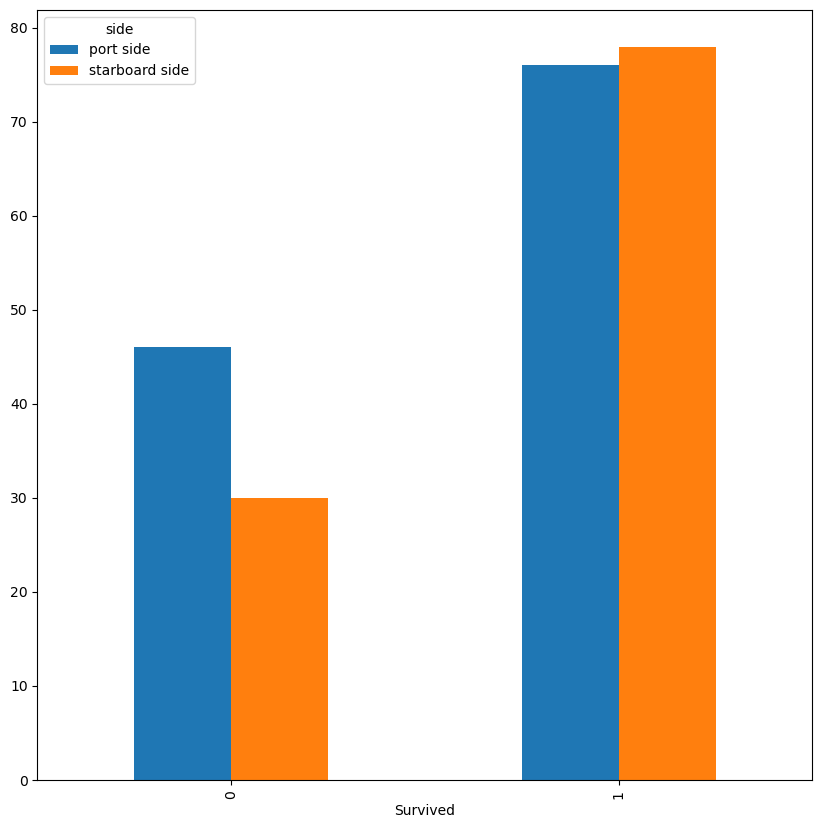

In [62]:
df2.groupby(
    ['Survived', 'side']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))  # starboard side contains more survivers 

In [63]:
df2[['side', 'Survived']].groupby(['side'], as_index=False).mean()

,side,Survived
0,port side,0.622951
1,starboard side,0.722222


##### QUESTION 2 ###

In [64]:
df2["deck"] = df2.cabin2.str.extract('([a-zA-Z ]+)', expand=False).str.strip()

<AxesSubplot:xlabel='Survived'>

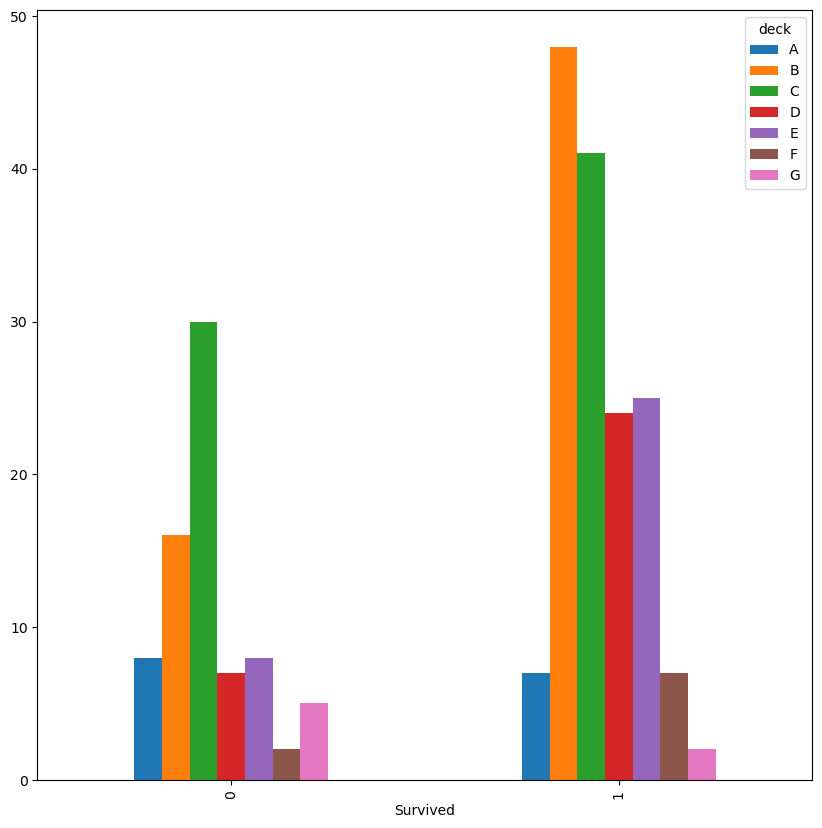

In [65]:
df2.groupby(
    ['Survived', 'deck']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10)) # deck B contains more survivers 

##### QUESTION 3 #####

In [ ]:
#Best place = deck B, starboard side

##### QUESTION 4 #####

In [66]:
df[['Survived','Parch']].corr()

,Survived,Parch
Survived,1.000000,0.081629
Parch,0.081629,1.000000


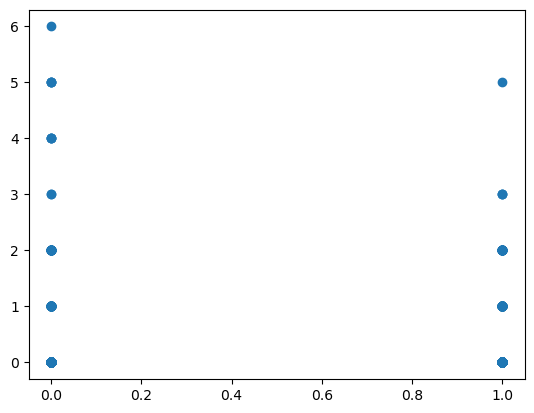

In [67]:
plt.scatter(df.Survived, df.Parch)

In [68]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [69]:
df.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

### Question 4

In [107]:
# Prédiction avec SVM
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
#X = train.drop(['Name','Survived','Cabin','Ticket',
                  #'Age'],axis = 1)
#y = traindf['Survived']

In [108]:
train ["generation"] = df["generation"]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.315, 30.263]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.368, 20.315]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.315, 30.263]"


In [109]:
train = pd.merge(train, df2.loc[:,["PassengerId","side","deck"]], how='left', on='PassengerId').reset_index(drop=True)

In [110]:
train ['side'] = train['side'].fillna(0)
train ['deck'] = train['deck'].fillna(0)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,side,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]",0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]",starboard side,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]",0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]",starboard side,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.315, 30.263]",0,0
917,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.368, 20.315]",port side,B
918,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0,0
919,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.315, 30.263]",port side,C


In [113]:
X = train.drop(['Name','Survived','Cabin','Ticket','Fare','Age'],axis = 1)
X = pd.get_dummies(X)
y = train['Survived']
X

,PassengerId,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"generation_(0.34, 10.368]",...,side_port side,side_starboard side,deck_0,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,1,3,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,3,3,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,5,3,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,887,2,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
917,888,1,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
918,889,3,1,2,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
919,890,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [119]:
clf_svm = SVC(kernel='linear')

#Train the model using the training sets
clf_svm.fit(X, y)

SVC(kernel='linear')

In [121]:
y_pred = clf_svm.predict(test)

C:\Users\lmfx\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
- Cabin
- Embarked
- Fare
- Name
- ...
Feature names seen at fit time, yet now missing:
- Embarked_C
- Embarked_Q
- Embarked_S
- Sex_female
- Sex_male
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Kelly, Mr. James'

In [76]:
# Test machine learning

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
train_test_data = [train, test]
 
def dataprep(data):
    sexe = pd.get_dummies(data['Sex'], prefix='sex')
    cabin = pd.get_dummies(data['Cabin'].fillna('X').str[0], prefix='Cabin')
    # Age
    age = data['Age'].fillna(data['Age'].mean())
    emb = pd.get_dummies(data['Embarked'], prefix='emb')
    # Prix du billet / Attention une donnée de test n'a pas de Prix
    faresc = pd.DataFrame(MinMaxScaler().fit_transform(data[['Fare']].fillna(0)), columns = ['Prix'])
    # Classe
    pc = pd.DataFrame(MinMaxScaler().fit_transform(data[['Pclass']]), columns = ['Classe'])
 
    dp = data[['SibSp']].join(pc).join(sexe).join(emb).join(faresc).join(cabin).join(age)
    return dp


In [77]:
# On retire la variable cabin_t puisqu'elle n'existe pas dans le df test
Xtrain = dataprep(train)
del Xtrain['Cabin_T']
Xtest = dataprep(test)
Xtrain

,SibSp,Classe,sex_female,sex_male,emb_C,emb_Q,emb_S,Prix,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X,Age
0,1,1.0,0,1,0,0,1,0.014151,0,0,0,0,0,0,0,1,22.000000
1,1,0.0,1,0,1,0,0,0.139136,0,0,1,0,0,0,0,0,38.000000
2,0,1.0,1,0,0,0,1,0.015469,0,0,0,0,0,0,0,1,26.000000
3,1,0.0,1,0,0,0,1,0.103644,0,0,1,0,0,0,0,0,35.000000
4,0,1.0,0,1,0,0,1,0.015713,0,0,0,0,0,0,0,1,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.5,0,1,0,0,1,0.025374,0,0,0,0,0,0,0,1,27.000000
887,0,0.0,1,0,0,0,1,0.058556,0,1,0,0,0,0,0,0,19.000000
888,1,1.0,1,0,0,0,1,0.045771,0,0,0,0,0,0,0,1,29.699118
889,0,0.0,0,1,1,0,0,0.058556,0,0,1,0,0,0,0,0,26.000000


In [74]:
# Entrainement du modèle avec le modèle Random Forest
y = train.Survived
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(Xtrain, y)
p_tr = rf.predict(Xtrain)
print ("Score Train -- ", round(rf.score(Xtrain, y) *100,2), " %")

Score Train --  98.54  %


In [75]:
# On applique le modèle entraîné sur le df de test
p_test = rf.predict(Xtest)
# On insère les résultats avec une colonne avec l'ID Passenger et une seconde indiquant si le passager a survécu ou pas
result = pd.DataFrame(test['PassengerId'])
pred = pd.DataFrame(p_test, columns=['Survived'])
result = result.join(pred)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
